In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
plt.rc('font', family = 'AppleGothic')
plt.rc('axes', unicode_minus = False)

In [179]:
# 1. 데이터 불러오기 및 탐색

In [180]:
# 1-1. 데이터 불러오기
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [181]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [182]:
# 1-2. 변수 정리하기
def segColumns(df):
    meta = []
    for column in df.columns:
        role = "input"
        if 'bin' in column or column == 'target':
            level = 'binary'
        elif 'cat' in column:
            level = 'nominal'
        elif df[column].dtype == 'int64':
            level = 'ordinal'
        else:
            level = 'interval' 
        keep = 'True'
        dtype = df[column].dtype
        
        if column == 'id':
            level = 'nominal'
            role = 'target'
            keep = 'False'
        
        meta.append([column, role, level, keep, dtype])
        
    meta = pd.DataFrame(meta, columns = ['varname', 'role', 'level', 'keep', 'dtype'])
    return meta

In [183]:
meta = segColumns(train)

In [184]:
meta.index = meta['varname']
meta.name = 'varname'
meta = meta.drop('varname', axis = 1)
meta.head()

,role,level,keep,dtype
varname,,,,
id,target,nominal,False,int64
target,input,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64


In [185]:
# 1-3. Porto 데이터셋의 열에 대한 요약 통계 및 결측치 확인
test[meta[(meta['level'] == 'ordinal') | (meta['level'] == 'interval')].index].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,...,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000
mean,1.902371,4.413734,0.012383,7.296862,0.611057,0.439868,0.551740,2.346606,0.379957,0.813637,...,1.885328,7.687805,3.009537,9.225854,2.338538,8.443167,5.438478,1.440265,2.875013,7.540367
std,1.986503,2.700149,0.127251,3.541948,0.287699,0.404678,0.794023,0.831666,0.058385,0.224779,...,1.136763,1.333521,1.415155,1.460560,1.248601,2.906361,2.330081,1.200620,1.694072,2.745882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.141421,0.275778,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,0.400000,0.200000,0.524404,2.000000,0.316228,0.671234,...,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,0.700000,0.300000,0.721110,3.000000,0.374166,0.766081,...,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,0.900000,0.600000,1.002185,3.000000,0.400000,0.906132,...,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,0.900000,1.800000,4.423517,3.000000,1.264911,4.031301,...,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,20.000000,11.000000,15.000000,28.000000


In [186]:
# 결측치 확인 
(train == -1).sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [187]:
# 1-4. Meta를 이용하여  nominal을 제외한 나머지 변수 각각 기술통계(describe)

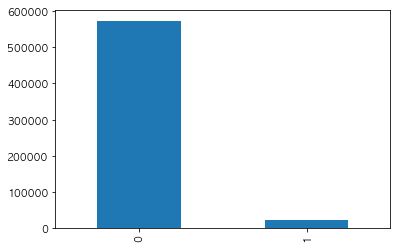

In [188]:
# 1-5. Target 값 분포 시각화 및 살펴보기
train.target.value_counts().plot.bar()
plt.show()

In [189]:
# 2. 데이터 품질 검사

In [190]:
# 2-1. 결측치 확인 및 처리하기

In [191]:
# 결측치가 존재하는 컬럼
(train == -1).sum().sort_values(ascending = False)[:13]

ps_car_03_cat    411231
ps_car_05_cat    266551
ps_reg_03        107772
ps_car_14         42620
ps_car_07_cat     11489
ps_ind_05_cat      5809
ps_car_09_cat       569
ps_ind_02_cat       216
ps_car_01_cat       107
ps_ind_04_cat        83
ps_car_02_cat         5
ps_car_11             5
ps_car_12             1
dtype: int64

In [192]:
# 결측치의 비율이 높은 ['ps_car_03_cat', 'ps_car_05_cat'] 삭제
(train == -1).sum().sort_values(ascending = False)[:13] / train.shape[0]

ps_car_03_cat    0.690898
ps_car_05_cat    0.447825
ps_reg_03        0.181065
ps_car_14        0.071605
ps_car_07_cat    0.019302
ps_ind_05_cat    0.009760
ps_car_09_cat    0.000956
ps_ind_02_cat    0.000363
ps_car_01_cat    0.000180
ps_ind_04_cat    0.000139
ps_car_02_cat    0.000008
ps_car_11        0.000008
ps_car_12        0.000002
dtype: float64

In [193]:
train = train.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis = 1)
test = test.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis = 1)

In [194]:
meta = meta.drop(['ps_car_03_cat', 'ps_car_05_cat'])

In [195]:
# 결측값(-1) 처리가 필요한 칼럼
modify_columns = ((train == -1).sum().sort_values(ascending = False)[:13] / train.shape[0]).index

In [196]:
meta.loc[modify_columns]

,role,level,keep,dtype
ps_reg_03,input,interval,True,float64
ps_car_14,input,interval,True,float64
ps_car_07_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_car_09_cat,input,nominal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_car_01_cat,input,nominal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_car_11,input,ordinal,True,int64
ps_car_02_cat,input,nominal,True,int64


In [197]:
# ordinal -> 가장 빈도 높은 것으로
# interval -> mean으로
# nominal -> 가장 빈도 높은 것 or 결측치 자체로

In [198]:
ordinal_columns = meta[meta['level'] == 'ordinal'].index
interval_columns = meta[meta['level'] == 'interval'].index

In [199]:
def fillNA(df, columns, types):
    if types == 'ordinal':
        for column in columns:
            most_value = df[column].value_counts().index[0]
            df.loc[df[column] == -1, column] = most_value
    elif types == 'interval':
        for column in columns:
            mean_value = round(df[column].mean(),2)
            df.loc[df[column] == -1, column] = mean_value
    return df

In [200]:
train = fillNA(train, ordinal_columns, 'ordinal')
train = fillNA(train, interval_columns, 'interval')

In [201]:
test = fillNA(test, ordinal_columns, 'ordinal')
test = fillNA(test, interval_columns, 'interval')

In [202]:
# 2-2 nominal 데이터의 유니크값 개수 확인하기
# 'ps_car_11_cat'은 104개의 범주값을 가짐
train[meta[meta['level'] == 'nominal'].index].nunique()

id               595212
ps_ind_02_cat         5
ps_ind_04_cat         3
ps_ind_05_cat         8
ps_car_01_cat        13
ps_car_02_cat         3
ps_car_04_cat        10
ps_car_06_cat        18
ps_car_07_cat         3
ps_car_08_cat         2
ps_car_09_cat         6
ps_car_10_cat         3
ps_car_11_cat       104
dtype: int64

In [203]:
meta.loc['ps_car_11_cat']['keep'] = 'False'

In [204]:
# 3. 데이터시각화

In [205]:
# 3-1. 범주형 변수 catplot
cat_columns = meta.loc[(meta['level'] == 'nominal') & (meta['keep'] == 'True')].index

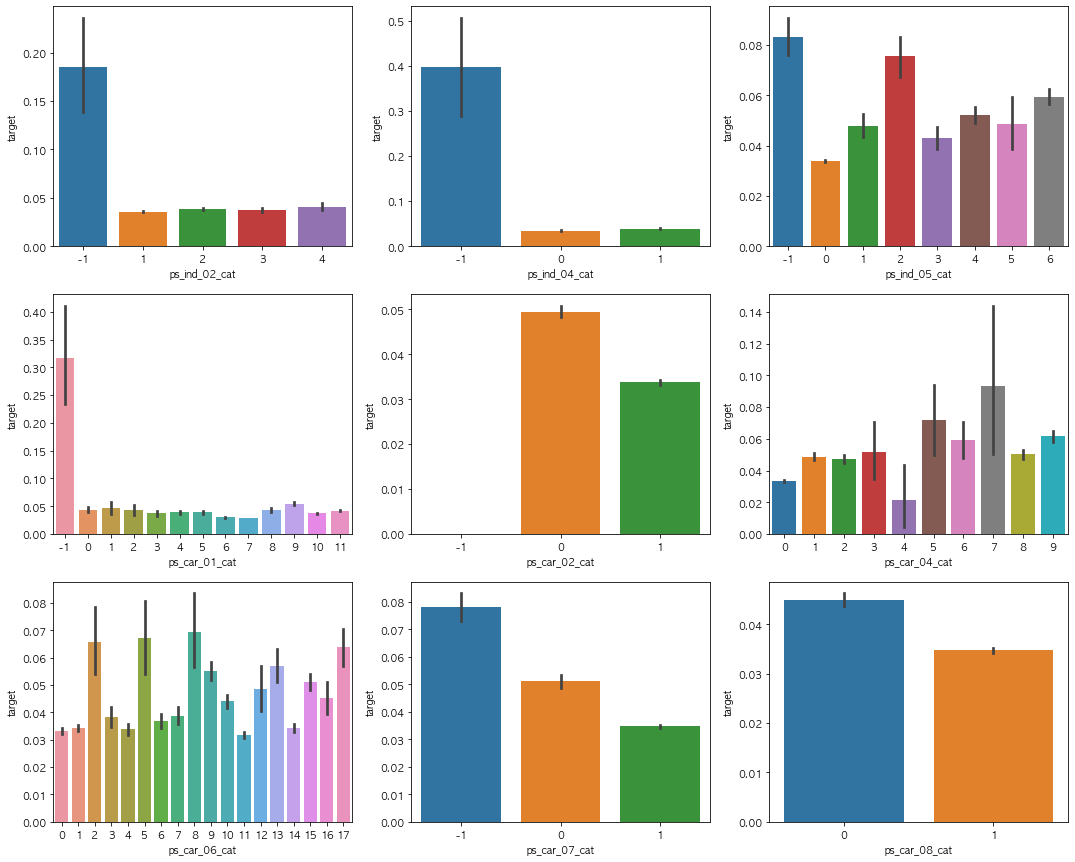

In [231]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 2)
gs0 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[0])
gs1 = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[1])

fig = plt.figure(figsize = (40,15))

for i, column in list(zip(np.arange(12), cat_columns)):
    ax = fig.add_subplot(gs0[i//3, i%3])
    sns.barplot(ax = ax, data = train, y = 'target', x = column) # 각 범주값에 따른 target의 평균
    
    if i == 8:
        break

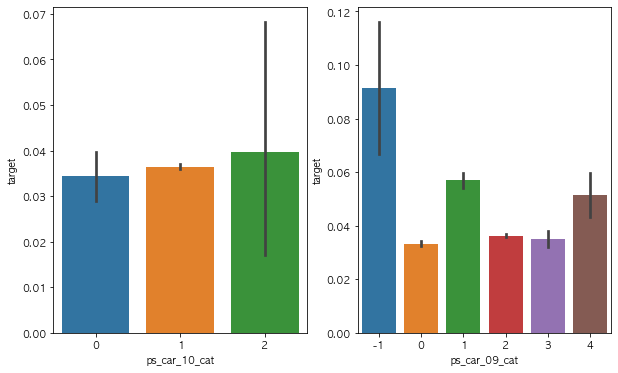

In [232]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))
sns.barplot(ax = ax[0], data = train, y = 'target', x = cat_columns[-1])
sns.barplot(ax = ax[1], data = train, y = 'target', x = cat_columns[-2])
plt.show()

In [233]:
# 결측치가 존재하는 category columns
(train == -1).sum().sort_values(ascending = False)[:7]

ps_car_07_cat    11489
ps_ind_05_cat     5809
ps_car_09_cat      569
ps_ind_02_cat      216
ps_car_01_cat      107
ps_ind_04_cat       83
ps_car_02_cat        5
dtype: int64

In [249]:
na_cat_columns = (train == -1).sum().sort_values(ascending = False)[:7].index

In [253]:
labels = [0, 2, 1, 4, 9, 1, 1]

In [257]:
# 결측치의 barplot이 가까운 범주로 넘기기
def changeNA(df):
    for column, i in zip(na_cat_columns, labels):
        df.loc[df[column] == -1, column] = i
    return df

In [259]:
train = changeNA(train)

In [262]:
test = changeNA(test)

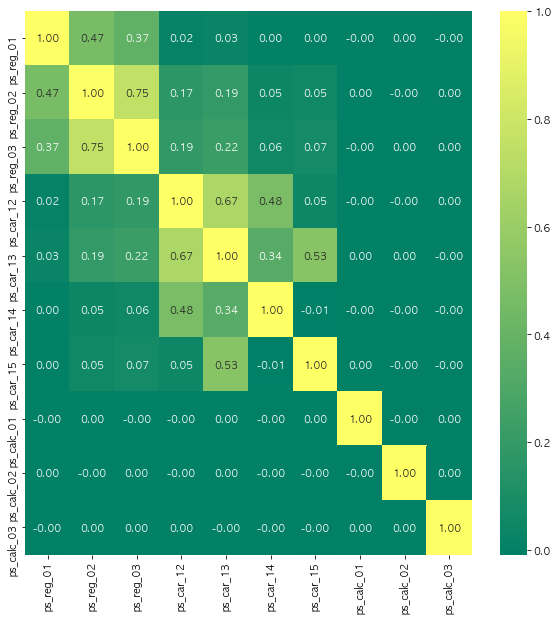

In [263]:
# 3-2. continous 데이터 seaborn heatmap 그려보기
temp = train[meta[meta['level'] == 'interval'].index]
plt.figure(figsize = (10,10))
sns.heatmap(temp.corr(), fmt='.2f', annot = True, cmap = 'summer')
plt.show()

In [264]:
# 3-3. 상관계수가 0.5이상인 변수들만 개별적으로 seaborn lmplot 그려보기(단, hue=’target’)
cor = temp.corr()

In [265]:
cor = cor.replace(1, 0)

In [266]:
cor = abs(cor)

In [267]:
v = []
for column in cor.columns:
    idx = cor.loc[cor[column] > 0.5, column].index
    for i in idx:
        v.append((column, i))

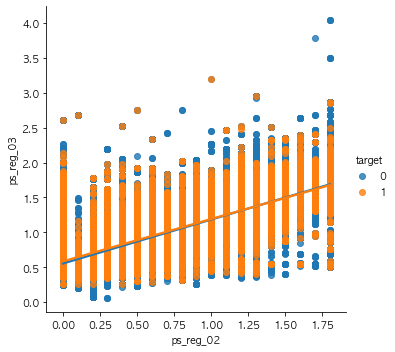

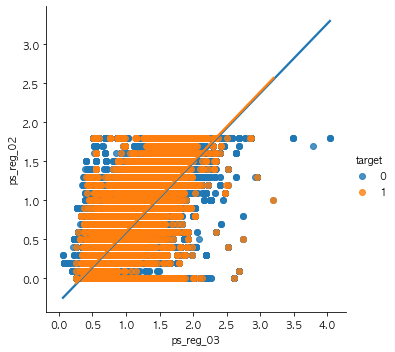

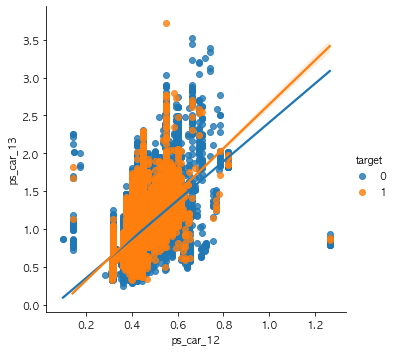

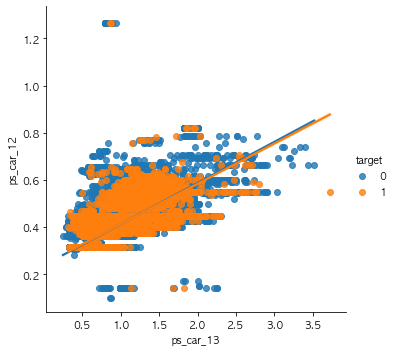

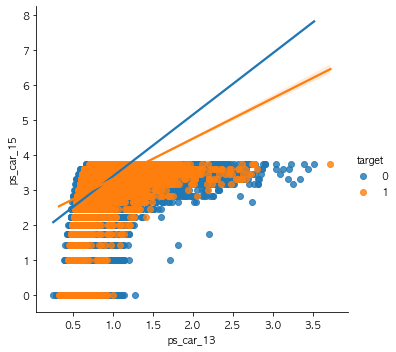

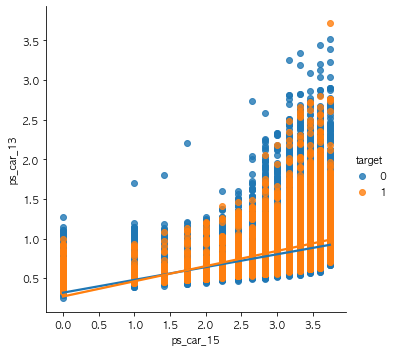

In [279]:
for x,y in v:
    sns.lmplot(data = train, x = x, y = y, hue = 'target')

In [280]:
# 3-4. ordinal 데이터 각각 target 값에 따라 boxplot 그려보기

In [282]:
ord_columns = meta[meta['level'] == 'ordinal'].index

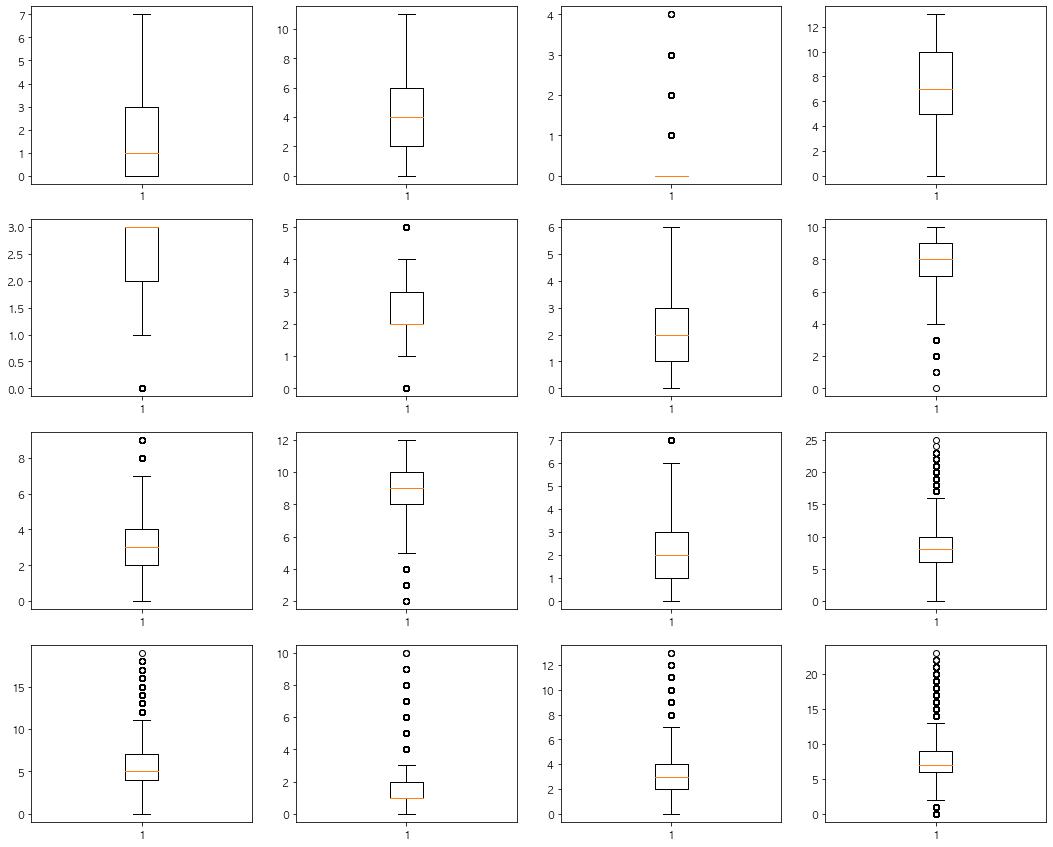

In [293]:
gs0 = gridspec.GridSpecFromSubplotSpec(4, 4, subplot_spec=gs[0])
fig = plt.figure(figsize = (40,15))

for i, column in list(zip(np.arange(17), ord_columns)):
    ax = fig.add_subplot(gs0[i//4, i%4])
    plt.boxplot( data = train, x = column)

In [294]:
# 4. 피처엔지니어링

In [295]:
# 4-1. nominal 변수 원핫인코딩

In [306]:
cat_columns = meta[(meta['level'] == 'nominal') & (meta['keep'] == 'True')].index

In [310]:
for column in cat_columns:
    train[column] = train[column].astype(object)

In [321]:
for column in cat_columns:
    test[column] = test[column].astype(object)

In [316]:
data = pd.get_dummies(train)

In [398]:
data_test = pd.get_dummies(test)

In [ ]:
# 4-2. 언더샘플링

In [320]:
# 데이터가 매우 불균형한 상태
data.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [328]:
idx = data['id']
X = data.iloc[:,2:]
y = data['target']

In [402]:
idx_test = data_test['id']
X_test = data_test.iloc[:,1:]

In [324]:
from imblearn.under_sampling import *

In [337]:
X_samp, y_samp = RandomUnderSampler(sampling_strategy = 0.3, replacement = False).fit_sample(X, y)

In [332]:
# 3:7 정도의 비율을 가지게 되었음
y_samp.value_counts()

0    72313
1    21694
Name: target, dtype: int64

In [340]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [341]:
X_samp = scaler.fit_transform(X_samp)

In [342]:
X_samp = pd.DataFrame(X_samp, columns = X.columns)

In [404]:
X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [346]:
# 4-3. randomforest의 feature_importance를 통해 중요도 하위 50%의 변수 제거 

In [344]:
from sklearn.ensemble import RandomForestClassifier

In [347]:
rfo = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42) 

In [349]:
rfo.fit(X_samp, y_samp)
importances = rfo.feature_importances_

In [353]:
n_features = np.arange(X_samp.shape[1])

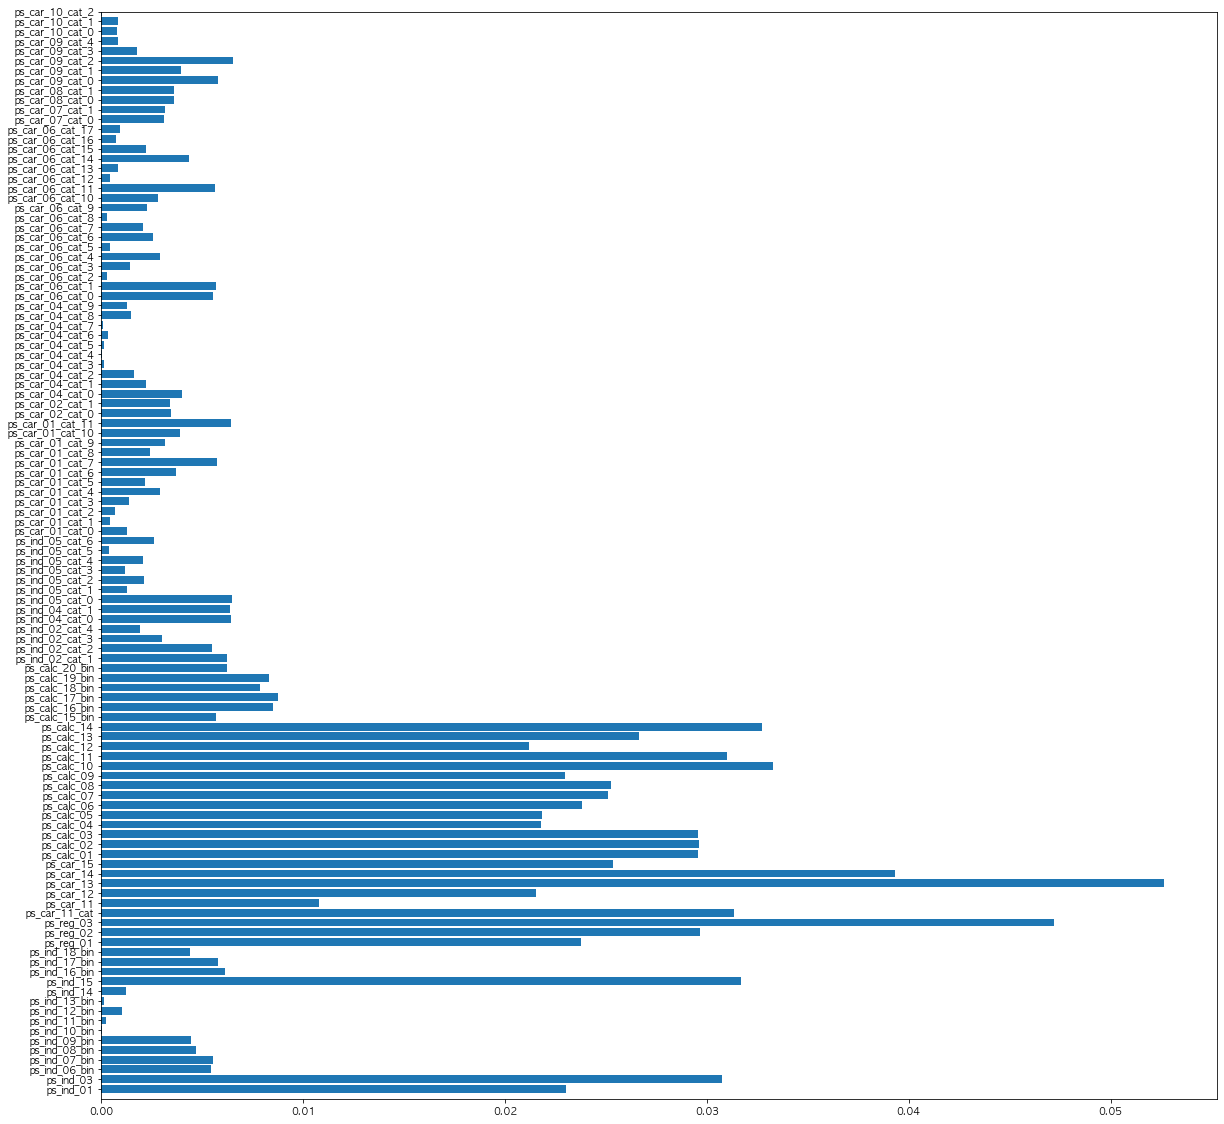

In [367]:
plt.figure(figsize = (20,20))
plt.barh(n_features, importances, align='center')
plt.yticks(n_features, X_samp.columns)
plt.ylim(-1, n_features[-1])
plt.show()

In [372]:
pd.DataFrame(list(zip(X_samp.columns, importances)), columns = ['column', 'importance']).sort_values('importance', ascending = False)

,column,importance
21,ps_car_13,0.052637
17,ps_reg_03,0.047200
22,ps_car_14,0.039319
33,ps_calc_10,0.033298
37,ps_calc_14,0.032710
...,...,...
9,ps_ind_13_bin,0.000144
78,ps_car_04_cat_7,0.000084
110,ps_car_10_cat_2,0.000069
6,ps_ind_10_bin,0.000055


In [374]:
from sklearn.feature_selection import SelectFromModel

In [382]:
selected = SelectFromModel(rfo, threshold='median', prefit=True)

In [389]:
selected_columns = X_samp.columns[selected.get_support()]

In [391]:
X_selected = pd.DataFrame(selected.transform(X_samp), columns = selected_columns)

In [410]:
X_test_selected = X_test[selected_columns]

In [393]:
# 5. 모델링

In [394]:
# 5-1. StratifiedKFold 진행 (seed부여)

In [412]:
from sklearn.model_selection import StratifiedKFold

In [413]:
skf = StratifiedKFold(n_splits=3, random_state = 42)

/Users/jinseok/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [428]:
from sklearn.ensemble import GradientBoostingClassifier

In [429]:
models = [RandomForestClassifier(), GradientBoostingClassifier()]

In [451]:
scores = []
for m in zip(['RFO', 'GBM'], models):
    for i, (idx_train, idx_valid) in enumerate(skf.split(X_selected, y_samp)):
        x_train = X_selected.iloc[idx_train]
        y_train = y_samp.iloc[idx_train]
        x_valid = X_selected.iloc[idx_valid]
        y_valid = y_samp.iloc[idx_valid]

        model = m[1]
        result = model.fit(x_train, y_train)

        pred = result.predict(x_valid)
        score = result.score(x_valid, y_valid)
        scores.append(score)
        
    print(m[0], np.mean(scores))

RFO 0.769591624405988
GBM 0.7699798970423967


In [452]:
pred = model.predict_proba(X_test_selected)

In [464]:
sub = pd.read_csv('./sample_submission.csv')

In [466]:
sub['target'] = pred[:,1]

In [469]:
sub.to_csv('./submission_1.csv', index = False)